In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Créé Nov 2024 auteur: David ALBERTO (www.astrolabe-science.fr)
Modifié avec Delphine Chareyron en 2025
Ce script trace la trajectoire héliocentrique d'un astre, et met en 
évidence la 2e loi de Kepler, en calculant les aires balayées par le
rayon vecteur de l'astre autour de son périhélie, de son aphélie et d'un point 
quelconque de l'orbite.
Données : éphémérides IMCCE (https://ssp.imcce.fr/forms/ephemeris)
Réf. : T. Appéré, Découvrir les lois de Kepler avec le langage
de programmation Python, BUP n°1063, avril 2024.
"""


"\nCréé Nov 2024 auteur: David ALBERTO (www.astrolabe-science.fr)\nModifié avec Delphine Chareyron en 2025\nCe script trace la trajectoire héliocentrique d'un astre, et met en \névidence la 2e loi de Kepler, en calculant les aires balayées par le\nrayon vecteur de l'astre autour de son périhélie et de son aphélie.\nDonnées : éphémérides IMCCE (https://ssp.imcce.fr/forms/ephemeris)\nRéf. : T. Appéré, Découvrir les lois de Kepler avec le langage\nde programmation Python, BUP n°1063, avril 2024.\n"

In [3]:

# Appel des modules -----------------------------
import matplotlib.pyplot as plt # graphiques
import numpy as np  # gestion de séries de données et calculs
import pandas as pd  # import de données et gestion en tableau


In [5]:

#  Import des données -----------------------------

nom_astre = 'Mercure'
# nom_astre = 'Mars'
# nom_astre = 'comete 2P-Encke'
#  import des positions de l'astre depuis un fichier csv :
astre = pd.read_csv(
    'mercure.csv',
    # 'mars.csv',
    # 'comete_2PEncke.csv',
    sep=';',
    usecols=[0, 1, 2, 3, 4],  # sélection des colonnes utiles
    names = ['date', 'X', 'Y', 'Z', 'distance'],  # en-têtes
    skiprows=1,  # passer la 1e ligne qui contient les noms des grandeurs
    )
nom_fichier = 'Kepler_loi_aires_' + nom_astre
mi_temps = 60  # demi-durée de l'intervalle de temps pour Mercure, (à adapter en fonction de l'astre étudié)

#Ici on calculera l’aire balayée autour du périhélie et de l’aphélie sur un déplacement de Mercure
#pendant 120 h à raison de 60 h avant et 60 h après chaque extremum de la trajectoire.


In [7]:

#  Définition des fonctions ---------------------------------

def calcul_angle(x, y):
    """
    x, y : composantes des positions de l'astre.
    Renvoie l'angle en radians (float).
    Cet angle est la longitude écliptique héliocentrique de l'astre.
    """
    angle = np.arctan2(y, x)
    return angle



def coord_perihelie(r):
    """
    Renvoie les coordonnées (angle, rayon, index) du périhélie (float).
    Angle : radians. rayon : ua.
    index : entier.
    """
    r_peri = min(r)
    idx_peri = np.where(y==r_peri)[0][0]
    x_peri = x.iloc[idx_peri]
    return x_peri, r_peri, idx_peri

def coord_aphelie(r):
    """
    Renvoie les coordonnées (angle, rayon) de l'aphélie (float).
    Angle : radians. rayon : ua.
    index : entier.
    """
    r_aphelie = max(r)
    idx_aphelie = np.where(y==r_aphelie)[0][0]
    x_aphelie = x.iloc[idx_aphelie]
    return x_aphelie, r_aphelie, idx_aphelie

def calcul_aire(indice_date_debut, couleur='gray'):
    """
    indice_date_debut : indice du début du comptage
    Calcule l'aire balayée par l'astre depuis la date de début pendant l'intervalle de temps.
    Le calcul cumule les aires des triangles formés par le rayon vecteur et par le vecteur vitesse.
    Trace les rayons vecteurs pour chaque date, pour matérialiser le secteur.
    """
    aire=0
    vit=0
    ang=0
    dA_vit=0
    Aires =[0]
    for i in range(indice_date_debut, indice_date_debut+2*mi_temps):
        r1 = astre.position.iloc[i]
        r2 = astre.position.iloc[i+1]
        
        vit=tuple(map(lambda i, j: i - j, r2,r1))
        ang=np.abs(np.arccos(np.dot(r1,vit)/(np.linalg.norm(vit)*np.linalg.norm(r1))))
        
        dA_vit = 1/2 * np.linalg.norm(r1)*np.linalg.norm(vit)*np.sin(ang)

        aire = aire + dA_vit
        Aires.append(dA_vit)
        
        # tracé du rayon vecteur :
        ax.plot([0, astre.angle.iloc[i]], [0, astre.distance.iloc[i]],
                c=couleur, zorder=0)
    return aire, Aires

In [9]:

# Les valeurs la longitude écliptique héliocentrique de l'astre sont calculées et les résultats sont insérés dans une nouvelle colonne du tableau 'astre'.

astre['angle'] = astre.apply(lambda df: calcul_angle(df.X, df.Y), axis=1)
astre['position'] = astre.apply(lambda df: (df.X, df.Y, df.Z), axis=1)  


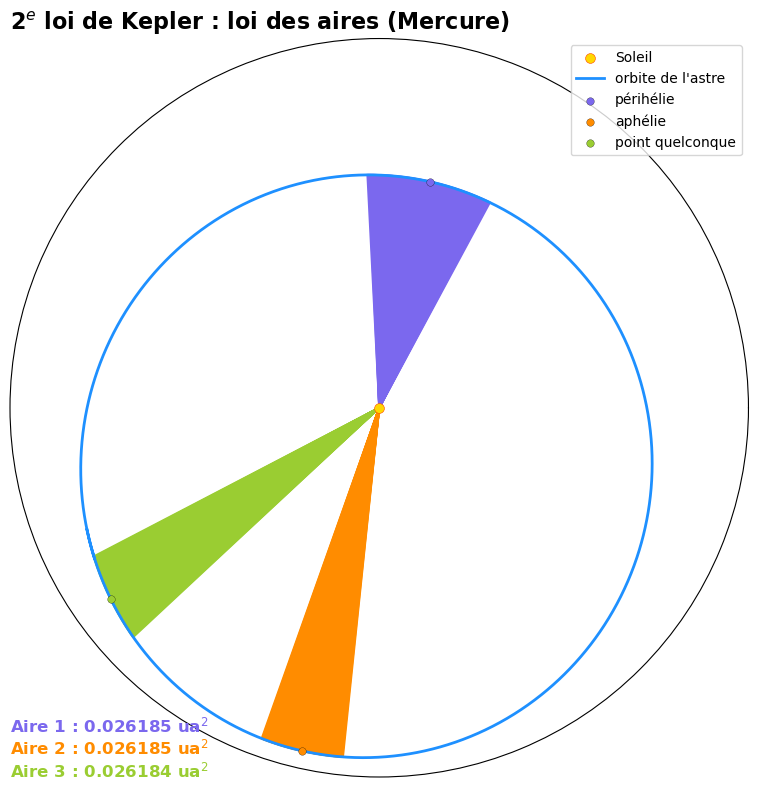

In [11]:

#  Figure et graphique ---------------------
fig = plt.figure(figsize=(8, 8),
                 tight_layout = True)

ax = plt.subplot(111, projection='polar')
ax.set_yticklabels([])  # suppression des graduations radiales
ax.set_xticklabels([])  # suppression des graduations angulaires
ax.set_title(fr'2$^e$ loi de Kepler : loi des aires ({nom_astre})', fontsize=16,
             fontweight='bold', loc='left')

# point pour le Soleil :
ax.scatter(0,0, color='gold', s=50, ec='orangered', lw=0.4,
           label='Soleil')

# Paramètres à personaliser 
couleur_peri = 'mediumslateblue'  # couleur pour le périhélie
couleur_aphelie = 'darkorange'  # couleur pour l'aphélie

#  Tracé de la trajectoire :
x = astre.angle
y = astre.distance
ax.plot(x, y, lw=2, c='dodgerblue', label="orbite de l'astre")

#  Calcul et tracé du point du périhélie
theta_peri, r_peri, index_peri = coord_perihelie(astre.distance)
ax.scatter(theta_peri, r_peri, zorder=3, s=30, label='périhélie',
           c=couleur_peri, ec='k', lw=0.2)

# Calcul et tracé du point de l'aphélie
theta_aphelie, r_aphelie, index_aphelie = coord_aphelie(astre.distance)
ax.scatter(theta_aphelie, r_aphelie, zorder=3, s=30, label='aphélie',
           c=couleur_aphelie, ec='k', lw=0.2)

# Calcul et tracé d'un point quelconque de la trajectoire
signe = int(np.sign(np.random.random()-0.5))  # +1 ou -1, pour le tirage aléatoire
if index_aphelie > index_peri:
    index_rand = np.random.randint(index_peri+2*mi_temps,index_aphelie-2*mi_temps)
else:
    index_rand = np.random.randint(index_aphelie+2*mi_temps,index_peri-2*mi_temps)

# redéfinition de la position du point aléatoire d'un côté ou de l'autre de la trajectoire :
index_rand = abs(index_aphelie +2*mi_temps + signe * (abs(index_aphelie-index_rand)))

angle_rand = astre.angle.iloc[index_rand]
dist_rand = astre.distance.iloc[index_rand]
ax.scatter(angle_rand,dist_rand, s=30, label='point quelconque', c='yellowgreen', ec='k', lw=0.2,
           zorder=3)

#  Calculs des aires 

index_debut1 = index_peri - mi_temps
aire1, Aires1 = calcul_aire(index_debut1, couleur=couleur_peri)


index_debut2 = index_aphelie - mi_temps
aire2, Aires2 = calcul_aire(index_debut2, couleur=couleur_aphelie)

index_debut3 = index_rand - mi_temps
aire3, Aires3 = calcul_aire(index_debut3, couleur= 'yellowgreen')


# Affichage des aires 
ax.text(0.0, 0.06, f'Aire 1 : {aire1:.5} ua$^2$', c=couleur_peri,
        transform=ax.transAxes,
        fontweight='bold', fontsize=12,)
ax.text(0.0, 0.03, f'Aire 2 : {aire2:.5} ua$^2$', c=couleur_aphelie,
        transform=ax.transAxes,
        fontweight='bold', fontsize=12,)
ax.text(0.0, 0.0, f'Aire 3 : {aire3:.5} ua$^2$', c='yellowgreen',
        transform=ax.transAxes, fontweight='bold', fontsize=12)

#  grille et légende
ax.grid(False)  # suppression de la grille
ax.legend(loc='upper right')
plt.show()

# Création de fichiers images :

fig.savefig(nom_fichier + '.png', dpi=300)
